 ## 通过Numpy实现简单的Neural Network
 
代码来自 https://github.com/RafayAK/NothingButNumPy

In [3]:
import numpy as np  # import numpy library
import matplotlib.pyplot as plt  # import matplotlib for plotting and visualization
import matplotlib
# from util.paramInitializer import initialize_parameters  # import function to initialize weights and biases
%matplotlib inline 

In [2]:

def initialize_parameters(n_in, n_out, ini_type='plain'):
    """
    Helper function to initialize some form of random weights and Zero biases
    Args:
        n_in: size of input layer
        n_out: size of output/number of neurons
        ini_type: set initialization type for weights

    Returns:
        params: a dictionary containing W and b
    """

    params = dict()  # initialize empty dictionary of neural net parameters W and b

    if ini_type == 'plain':
        params['W'] = np.random.randn(n_out, n_in) *0.01  # set weights 'W' to small random gaussian
    elif ini_type == 'xavier':
        params['W'] = np.random.randn(n_out, n_in) / (np.sqrt(n_in))  # set variance of W to 1/n
    elif ini_type == 'he':
        # Good when ReLU used in hidden layers
        # Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification
        # Kaiming He et al. (https://arxiv.org/abs/1502.01852)
        # http: // cs231n.github.io / neural - networks - 2 /  # init
        params['W'] = np.random.randn(n_out, n_in) * np.sqrt(2/n_in)  # set variance of W to 2/n

    params['b'] = np.zeros((n_out, 1))    # set bias 'b' to zeros

    return params


def compute_cost(Y, Y_hat):
    """
    This function computes and returns the Cost and its derivative.
    The is function uses the Squared Error Cost function -> (1/2m)*sum(Y - Y_hat)^.2

    Args:
        Y: labels of data
        Y_hat: Predictions(activations) from a last layer, the output layer

    Returns:
        cost: The Squared Error Cost result
        dY_hat: gradient of Cost w.r.t the Y_hat

    """
    m = Y.shape[1]

    cost = (1 / (2 * m)) * np.sum(np.square(Y - Y_hat))
    cost = np.squeeze(cost)  # remove extraneous dimensions to give just a scalar

    dY_hat = -1 / m * (Y - Y_hat)  # derivative of the squared error cost function

    return cost, dY_hat


def predict(X, Y, Zs, As):
    """
    helper function to predict on data using a neural net model layers

    Args:
        X: Data in shape (features x num_of_examples)
        Y: labels in shape ( label x num_of_examples)
        Zs: All linear layers in form of a list e.g [Z1,Z2,...,Zn]
        As: All Activation layers in form of a list e.g [A1,A2,...,An]
    Returns::
        p: predicted labels
        probas : raw probabilities
        accuracy: the number of correct predictions from total predictions
    """
    m = X.shape[1]
    n = len(Zs)  # number of layers in the neural network
    p = np.zeros((1, m))

    # Forward propagation
    Zs[0].forward(X)
    As[0].forward(Zs[0].Z)
    for i in range(1, n):
        Zs[i].forward(As[i-1].A)
        As[i].forward(Zs[i].Z)
    probas = As[n-1].A

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.5:  # 0.5 is threshold
            p[0, i] = 1
        else:
            p[0, i] = 0

    # print results
    # print ("predictions: " + str(p))
    # print ("true labels: " + str(y))
    accuracy = np.sum((p == Y) / m)

    return p, probas, accuracy*100


def plot_learning_curve(costs, learning_rate, total_epochs, save=False):
    """
    This function plots the Learning Curve of the model

    Args:
        costs: list of costs recorded during training
        learning_rate: the learning rate during training
        total_epochs: number of epochs the model was trained for
        save: bool flag to save the image or not. Default False
    """
    # plot the cost
    plt.figure()

    steps = int(total_epochs / len(costs))  # the steps at with costs were recorded
    plt.ylabel('Cost')
    plt.xlabel('Iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.plot(np.squeeze(costs))
    locs, labels = plt.xticks()
    plt.xticks(locs[1:-1], tuple(np.array(locs[1:-1], dtype='int')*steps))  # change x labels of the plot
    plt.xticks()
    if save:
        plt.savefig('Cost_Curve.png', bbox_inches='tight')
    plt.show()


def predict_dec(Zs, As, X):
    """
    Used for plotting decision boundary.

    Args:
        Zs: All linear layers in form of a list e.g [Z1,Z2,...,Zn]
        As: All Activation layers in form of a list e.g [A1,A2,...,An]
        X: Data in shape (features x num_of_examples) i.e (K x m), where 'm'=> number of examples
           and "K"=> number of features

    Returns:
        predictions: vector of predictions of our model (red: 0 / green: 1)
    """

    # Predict using forward propagation and a classification threshold of 0.5
    m = X.shape[1]
    n = len(Zs)  # number of layers in the neural network

    # Forward propagation
    Zs[0].forward(X)
    As[0].forward(Zs[0].Z)
    for i in range(1, n):
        Zs[i].forward(As[i - 1].A)
        As[i].forward(Zs[i].Z)
    probas = As[n - 1].A   # output probabilities

    predictions = (probas > 0.5)  # if probability of example > 0.5 => output 1, vice versa
    return predictions


def plot_decision_boundary(model, X, Y, feat_crosses=None, save=False):
    """
    Plots decision boundary

    Args:
        model: neural network layer and activations in lambda function
        X: Data in shape (num_of_examples x features)
        feat_crosses: list of tuples showing which features to cross
        save: flag to save plot image
    """
    # Generate a grid of points between -0.5 and 1.5 with 1000 points in between
    xs = np.linspace(-0.5, 1.5, 1000)
    ys = np.linspace(1.5, -0.5, 1000)
    xx, yy = np.meshgrid(xs, ys) # create data points
    # Predict the function value for the whole grid

    # Z = model(np.c_[xx.ravel(), yy.ravel()])  # => add this for feature cross eg "xx.ravel()*yy.ravel()"

    prediction_data = np.c_[xx.ravel(), yy.ravel()]
    # add feat_crosses if provided
    if feat_crosses:
        for feature in feat_crosses:
            prediction_data = np.c_[prediction_data, prediction_data[:, feature[0]]*prediction_data[:, feature[1]]]

    Z = model(prediction_data)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.style.use('seaborn-whitegrid')
    plt.contour(xx, yy, Z, cmap='Blues')  # draw a blue colored decision boundary
    plt.title('Decision boundary', size=18)
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    # color map 'cmap' maps 0 labeled data points to red and 1 labeled points to green
    cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y), marker='x', cmap=cmap)  # s-> size of marker

    if save:
        plt.savefig('decision_boundary.png', bbox_inches='tight')

    plt.show()


def plot_decision_boundary_shaded(model, X, Y, feat_crosses=None, save=False):
    """
        Plots shaded decision boundary

        Args:
            model: neural network layer and activations in lambda function
            X: Data in shape (num_of_examples x features)
            feat_crosses: list of tuples showing which features to cross
            save: flag to save plot image
    """

    # Generate a grid of points between -0.5 and 1.5 with 1000 points in between
    xs = np.linspace(-0.5, 1.5, 1000)
    ys = np.linspace(1.5, -0.5, 1000)
    xx, yy = np.meshgrid(xs, ys)
    # Predict the function value for the whole grid
    # Z = model(np.c_[xx.ravel(), yy.ravel()]) # => add this for feature cross eg "xx.ravel()*yy.ravel()"

    prediction_data = np.c_[xx.ravel(), yy.ravel()]
    # add feat_crosses if provided
    if feat_crosses:
        for feature in feat_crosses:
            prediction_data = np.c_[prediction_data, prediction_data[:, feature[0]] * prediction_data[:, feature[1]]]

    Z = model(prediction_data)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    cmap = matplotlib.colors.ListedColormap(["red","green"], name='from_list', N=None)
    plt.style.use('seaborn-whitegrid')

    # 'contourf'-> filled contours (red('#EABDBD'): 0 / green('#C8EDD6'): 1)
    plt.contourf(xx, yy, Z, cmap=matplotlib.colors.ListedColormap(['#EABDBD', '#C8EDD6'], name='from_list', N=None))
    plt.title('Decision boundary', size=18)
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y), marker='x', cmap=cmap)  # s-> size of marker

    if save:
        plt.savefig('decision_boundary_shaded.png', bbox_inches='tight')

    plt.show()



class LinearLayer:
    """
        This Class implements all functions to be executed by a linear layer
        in a computational graph

        Args:
            input_shape: input shape of Data/Activations
            n_out: number of neurons in layer
            ini_type: initialization type for weight parameters, default is "plain"
                      Opitons are: plain, xavier and he

        Methods:
            forward(A_prev)
            backward(upstream_grad)
            update_params(learning_rate)

    """

    def __init__(self, input_shape, n_out, ini_type="plain"):
        """
        The constructor of the LinearLayer takes the following parameters

        Args:
            input_shape: input shape of Data/Activations
            n_out: number of neurons in layer
            ini_type: initialization type for weight parameters, default is "plain"
        """

        self.m = input_shape[1]  # number of examples in training data
        # `params` store weights and bias in a python dictionary
        self.params = initialize_parameters(input_shape[0], n_out, ini_type)  # initialize weights and bias
        self.Z = np.zeros((self.params['W'].shape[0], input_shape[1]))  # create space for resultant Z output

    def forward(self, A_prev):
        """
        This function performs the forwards propagation using activations from previous layer

        Args:
            A_prev:  Activations/Input Data coming into the layer from previous layer
        """

        self.A_prev = A_prev  # store the Activations/Training Data coming in
        self.Z = np.dot(self.params['W'], self.A_prev) + self.params['b']  # compute the linear function

    def backward(self, upstream_grad):
        """
        This function performs the back propagation using upstream gradients

        Args:
            upstream_grad: gradient coming in from the upper layer to couple with local gradient
        """

        # derivative of Cost w.r.t W
        self.dW = np.dot(upstream_grad, self.A_prev.T)

        # derivative of Cost w.r.t b, sum across rows
        self.db = np.sum(upstream_grad, axis=1, keepdims=True)

        # derivative of Cost w.r.t A_prev
        self.dA_prev = np.dot(self.params['W'].T, upstream_grad)

    def update_params(self, learning_rate=0.1):
        """
        This function performs the gradient descent update

        Args:
            learning_rate: learning rate hyper-param for gradient descent, default 0.1
        """

        self.params['W'] = self.params['W'] - learning_rate * self.dW  # update weights
        self.params['b'] = self.params['b'] - learning_rate * self.db  # update bias(es)


In [4]:
class SigmoidLayer:
    """
    This class implements the Sigmoid Layer

    Args:
        shape: shape of input to the layer

    Methods:
        forward(Z)
        backward(upstream_grad)

    """

    def __init__(self, shape):
        """
        The consturctor of the sigmoid/logistic activation layer takes in the following arguments

        Args:
            shape: shape of input to the layer
        """
        self.A = np.zeros(shape)  # create space for the resultant activations

    def forward(self, Z):
        """
        This function performs the forwards propagation step through the activation function

        Args:
            Z: input from previous (linear) layer
        """
        self.A = 1 / (1 + np.exp(-Z))  # compute activations

    def backward(self, upstream_grad):
        """
        This function performs the  back propagation step through the activation function
        Local gradient => derivative of sigmoid => A*(1-A)

        Args:
            upstream_grad: gradient coming into this layer from the layer above

        """
        # couple upstream gradient with local gradient, the result will be sent back to the Linear layer
        self.dZ = upstream_grad * self.A*(1-self.A)

In [5]:
# This is our XOR gate data 

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [6]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [7]:
X_train = X

# add feature cross between 1st and 2nd feature
X_train = np.c_[X_train, X[:, 0]* X[:, 1]]  # "np.c_" concatenates data column-wise

# now we can set up data in the shape required by the neural net layers
X_train = X_train.T
Y_train = Y.T

In [8]:
X_train

array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 1]])

In [9]:
Y_train

array([[0, 1, 1, 0]])

In [10]:
# define training constants
learning_rate = 1
number_of_epochs = 5000

np.random.seed(48) # set seed value so that the results are reproduceable

# Our network architecture has the shape: 
#                       (input)--> [Linear->Sigmoid] -->(output)  


#------ LAYER-1 ----- define output layer that takes in training data 
Z1 = LinearLayer(input_shape=X_train.shape, n_out=1, ini_type='plain')
A1 = SigmoidLayer(Z1.Z.shape)

In [11]:
costs = [] # initially empty list, this will store all the costs after a certian number of epochs

# Start training
for epoch in range(number_of_epochs):
    
    # ------------------------- forward-prop -------------------------
    Z1.forward(X_train)
    A1.forward(Z1.Z)
    
    # ---------------------- Compute Cost ----------------------------
    cost, dA1 = compute_cost(Y=Y_train, Y_hat=A1.A)
    
    # print and store Costs every 100 iterations.
    if (epoch % 100) == 0:
        print("Cost at epoch#{}: {}".format(epoch, cost))
        costs.append(cost)
    
    # ------------------------- back-prop ---------------------------- 
    A1.backward(dA1)
    Z1.backward(A1.dZ)
    
    # ----------------------- Update weights and bias ----------------
    Z1.update_params(learning_rate=learning_rate)

Cost at epoch#0: 0.12480797532784463
Cost at epoch#100: 0.07434908897603773
Cost at epoch#200: 0.05055711748473411
Cost at epoch#300: 0.03643262431082579
Cost at epoch#400: 0.027671514044586787
Cost at epoch#500: 0.021929157273732916
Cost at epoch#600: 0.017964599404664255
Cost at epoch#700: 0.015104029541185851
Cost at epoch#800: 0.012963350559412182
Cost at epoch#900: 0.011312406038651465
Cost at epoch#1000: 0.010006868961998287
Cost at epoch#1100: 0.008952547095911286
Cost at epoch#1200: 0.008085796422895312
Cost at epoch#1300: 0.007362297621780561
Cost at epoch#1400: 0.006750366883673308
Cost at epoch#1500: 0.006226826400730868
Cost at epoch#1600: 0.00577437381840124
Cost at epoch#1700: 0.005379859016917353
Cost at epoch#1800: 0.005033126690065441
Cost at epoch#1900: 0.004726221322649468
Cost at epoch#2000: 0.004452829962544101
Cost at epoch#2100: 0.004207884472650881
Cost at epoch#2200: 0.00398727288191886
Cost at epoch#2300: 0.0037876267299368407
Cost at epoch#2400: 0.00360616222

In [12]:
# see the ouptput predictions
predicted_outputs, _, accuracy = predict(X=X_train, Y=Y_train, Zs=[Z1], As=[A1])

print("The predicted outputs:\n {}".format(predicted_outputs))
print("The accuracy of the model is: {}%".format(accuracy))

The predicted outputs:
 [[0. 1. 1. 0.]]
The accuracy of the model is: 100.0%


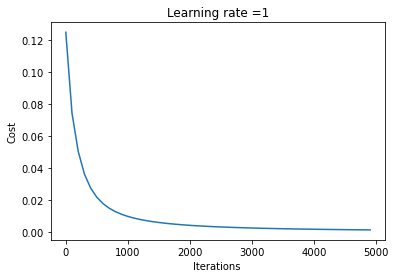

In [13]:
plot_learning_curve(costs=costs, learning_rate=learning_rate, total_epochs=number_of_epochs)

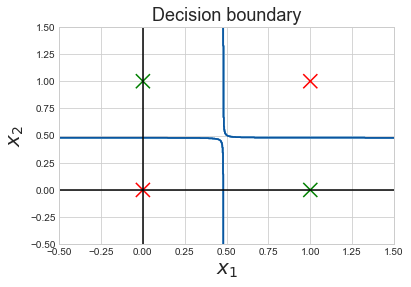

In [14]:
plot_decision_boundary(lambda x:predict_dec(Zs=[Z1], As=[A1], X=x.T), X_train.T, Y_train.T, feat_crosses=[(0,1)])

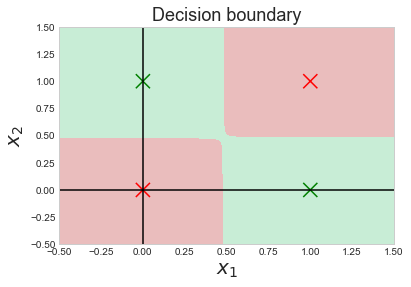

In [15]:
plot_decision_boundary_shaded(lambda x:predict_dec(Zs=[Z1], As=[A1], X=x.T), X_train.T, Y_train.T, feat_crosses=[(0,1)])